In [1]:
# =============================================================================
# Activity 6: Overfitting - The Complexity vs. Simplicity Trade-off
# =============================================================================
# 
# GOAL: Discover how complex models can fit training data perfectly
#       but fail miserably on new data (overfitting)
#
# CONCEPTS: Bias-variance tradeoff, training vs. test error, 
#           generalization, Occam's Razor
#
# THE LESSON: More complex is not always better!
# =============================================================================

In [1]:
# -----------------------------------------------------------------------------
# PART 1: Generate Data with a Simple True Relationship
# -----------------------------------------------------------------------------

set.seed(2024)

# The TRUE relationship is simple: y = 2 + 3x (linear!)
x_train <- seq(0, 10, length.out = 20)
y_true <- 2 + 3 * x_train

# But our observations have noise (measurement error, biological variability)
y_observed <- y_true + rnorm(20, mean = 0, sd = 8)

# Plot the data
plot(x_train, y_observed, 
     pch = 16, cex = 1.5,
     xlab = "X", ylab = "Y",
     main = "Training Data\n(True relationship: y = 2 + 3x)",
     ylim = c(-5, 40))
lines(x_train, y_true, col = "green", lwd = 3, lty = 2)
legend("topleft", 
       c("Observed data", "True relationship"), 
       pch = c(16, NA), 
       lty = c(NA, 2),
       col = c("black", "green"),
       lwd = c(NA, 3))

cat("=================================================================\n")
cat("We have 20 data points with noise.\n")
cat("TRUE relationship: y = 2 + 3x (simple linear)\n")
cat("Let's try fitting models of increasing complexity...\n")
cat("=================================================================\n\n")

In [1]:
# -----------------------------------------------------------------------------
# PART 2: Model 1 - Too Simple (Underfitting)
# -----------------------------------------------------------------------------

# Just predict the mean (ignores x completely!)
model_mean <- mean(y_observed)

plot(x_train, y_observed, 
     pch = 16, cex = 1.5,
     xlab = "X", ylab = "Y",
     main = "Model 1: Just the Mean (Too Simple!)",
     ylim = c(-5, 40))
abline(h = model_mean, col = "blue", lwd = 3)
lines(x_train, y_true, col = "green", lwd = 2, lty = 2)
legend("topleft", 
       c("Data", "True relationship", "Model: mean(y)"),
       pch = c(16, NA, NA),
       lty = c(NA, 2, 1),
       col = c("black", "green", "blue"),
       lwd = c(NA, 2, 3))

# Calculate training error
error_mean <- sum((y_observed - model_mean)^2) / length(y_observed)
cat("Model 1 (constant mean):\n")
cat("Training error (MSE):", round(error_mean, 2), "\n")
cat("This model UNDERFITS - too simple to capture the trend!\n\n")

In [1]:
# -----------------------------------------------------------------------------
# PART 3: Model 2 - Just Right (Good Fit)
# -----------------------------------------------------------------------------

# Fit a simple linear model (which is actually correct!)
model_linear <- lm(y_observed ~ x_train)

plot(x_train, y_observed, 
     pch = 16, cex = 1.5,
     xlab = "X", ylab = "Y",
     main = "Model 2: Linear (Just Right!)",
     ylim = c(-5, 40))
abline(model_linear, col = "red", lwd = 3)
lines(x_train, y_true, col = "green", lwd = 2, lty = 2)
legend("topleft", 
       c("Data", "True relationship", "Linear model"),
       pch = c(16, NA, NA),
       lty = c(NA, 2, 1),
       col = c("black", "green", "red"),
       lwd = c(NA, 2, 3))

error_linear <- sum(residuals(model_linear)^2) / length(y_observed)
cat("Model 2 (linear):\n")
cat("Training error (MSE):", round(error_linear, 2), "\n")
cat("Better fit than constant mean!\n\n")

In [1]:
# -----------------------------------------------------------------------------
# PART 4: Model 3 - Too Complex (Overfitting)
# -----------------------------------------------------------------------------

# Fit a 10th degree polynomial (way too complex!)
# This will fit almost every point perfectly

model_poly10 <- lm(y_observed ~ poly(x_train, degree = 10, raw = TRUE))

# Generate smooth predictions
x_smooth <- seq(0, 10, length.out = 200)
y_poly10 <- predict(model_poly10, newdata = data.frame(x_train = x_smooth))

plot(x_train, y_observed, 
     pch = 16, cex = 1.5,
     xlab = "X", ylab = "Y",
     main = "Model 3: 10th Degree Polynomial (Too Complex!)",
     ylim = c(-10, 50))
lines(x_smooth, y_poly10, col = "purple", lwd = 3)
lines(x_train, y_true, col = "green", lwd = 2, lty = 2)
legend("topleft", 
       c("Data", "True relationship", "10th degree poly"),
       pch = c(16, NA, NA),
       lty = c(NA, 2, 1),
       col = c("black", "green", "purple"),
       lwd = c(NA, 2, 3))

error_poly10 <- sum(residuals(model_poly10)^2) / length(y_observed)
cat("Model 3 (10th degree polynomial):\n")
cat("Training error (MSE):", round(error_poly10, 2), "\n")
cat("Lowest training error! But look at those wild wiggles...\n\n")

In [1]:
# -----------------------------------------------------------------------------
# PART 5: Compare Training Errors
# -----------------------------------------------------------------------------

cat("=================================================================\n")
cat("TRAINING ERROR COMPARISON:\n")
cat("=================================================================\n")
cat("Model 1 (mean):       MSE =", round(error_mean, 2), "\n")
cat("Model 2 (linear):     MSE =", round(error_linear, 2), "\n")
cat("Model 3 (poly 10):    MSE =", round(error_poly10, 2), " <- BEST!\n\n")

cat("On training data, complex model wins!\n")
cat("But wait... let's test on NEW data...\n\n")


# -----------------------------------------------------------------------------
# PART 6: The TRUE Test - New Data!
# -----------------------------------------------------------------------------

# Generate NEW test data from the same true relationship
x_test <- seq(0, 10, length.out = 15)
y_test_true <- 2 + 3 * x_test
y_test_observed <- y_test_true + rnorm(15, mean = 0, sd = 8)

# Predictions from each model
pred_mean <- rep(model_mean, length(x_test))
pred_linear <- predict(model_linear, newdata = data.frame(x_train = x_test))
pred_poly10 <- predict(model_poly10, newdata = data.frame(x_train = x_test))

# Calculate TEST errors
test_error_mean <- sum((y_test_observed - pred_mean)^2) / length(y_test_observed)
test_error_linear <- sum((y_test_observed - pred_linear)^2) / length(y_test_observed)
test_error_poly10 <- sum((y_test_observed - pred_poly10)^2) / length(y_test_observed)

cat("=================================================================\n")
cat("TEST ERROR (on new data):\n")
cat("=================================================================\n")
cat("Model 1 (mean):       MSE =", round(test_error_mean, 2), "\n")
cat("Model 2 (linear):     MSE =", round(test_error_linear, 2), " <- BEST!\n")
cat("Model 3 (poly 10):    MSE =", round(test_error_poly10, 2), " <- WORST!\n\n")

cat("SURPRISE! The complex model that fit training data perfectly\n")
cat("performs TERRIBLY on new data!\n\n")
cat("This is OVERFITTING.\n\n")

In [1]:
# -----------------------------------------------------------------------------
# PART 7: Visualize the Disaster
# -----------------------------------------------------------------------------

# Show all models on test data
plot(x_test, y_test_observed, 
     pch = 16, cex = 1.5, col = "darkgreen",
     xlab = "X", ylab = "Y",
     main = "Predictions on NEW Test Data",
     ylim = c(-50, 80))

points(x_test, pred_mean, col = "blue", pch = 4, cex = 1.5, lwd = 2)
points(x_test, pred_linear, col = "red", pch = 3, cex = 1.5, lwd = 2)
points(x_test, pred_poly10, col = "purple", pch = 2, cex = 1.5, lwd = 2)

lines(x_test, y_test_true, col = "green", lwd = 3, lty = 2)

legend("topleft", 
       c("True test data", "True relationship", 
         "Mean model", "Linear model", "Poly 10 model"),
       pch = c(16, NA, 4, 3, 2),
       lty = c(NA, 2, NA, NA, NA),
       col = c("darkgreen", "green", "blue", "red", "purple"),
       lwd = c(NA, 3, 2, 2, 2))

cat("Notice how the polynomial model makes WILD predictions\n")
cat("outside the training range and even within it!\n\n")

In [1]:
# -----------------------------------------------------------------------------
# PART 8: The Bias-Variance Tradeoff
# -----------------------------------------------------------------------------

# Let's simulate this many times to see the pattern

n_simulations <- 100
errors_train <- matrix(NA, nrow = n_simulations, ncol = 3)
errors_test <- matrix(NA, nrow = n_simulations, ncol = 3)

for (i in 1:n_simulations) {
  # Generate training data
  y_train <- y_true + rnorm(20, sd = 8)
  
  # Generate test data
  y_test <- y_test_true + rnorm(15, sd = 8)
  
  # Fit models
  m1 <- mean(y_train)
  m2 <- lm(y_train ~ x_train)
  m3 <- lm(y_train ~ poly(x_train, 10, raw = TRUE))
  
  # Training errors
  errors_train[i, 1] <- mean((y_train - m1)^2)
  errors_train[i, 2] <- mean(residuals(m2)^2)
  errors_train[i, 3] <- mean(residuals(m3)^2)
  
  # Test errors
  p1 <- rep(m1, length(x_test))
  p2 <- predict(m2, newdata = data.frame(x_train = x_test))
  p3 <- predict(m3, newdata = data.frame(x_train = x_test))
  
  errors_test[i, 1] <- mean((y_test - p1)^2)
  errors_test[i, 2] <- mean((y_test - p2)^2)
  errors_test[i, 3] <- mean((y_test - p3)^2)
}

# Plot the results
par(mfrow = c(1, 2))

boxplot(errors_train, 
        names = c("Mean", "Linear", "Poly 10"),
        col = c("lightblue", "lightcoral", "lavender"),
        main = "Training Error",
        ylab = "Mean Squared Error",
        ylim = c(0, max(errors_train)))

boxplot(errors_test, 
        names = c("Mean", "Linear", "Poly 10"),
        col = c("lightblue", "lightcoral", "lavender"),
        main = "Test Error (The Truth!)",
        ylab = "Mean Squared Error",
        ylim = c(0, max(errors_test)))

par(mfrow = c(1, 1))

cat("=================================================================\n")
cat("AVERAGE ERRORS OVER 100 SIMULATIONS:\n")
cat("=================================================================\n\n")

cat("Training Error:\n")
cat("Mean model:  ", round(mean(errors_train[, 1]), 2), "\n")
cat("Linear:      ", round(mean(errors_train[, 2]), 2), "\n")
cat("Poly 10:     ", round(mean(errors_train[, 3]), 2), " <- Best on training\n\n")

cat("Test Error:\n")
cat("Mean model:  ", round(mean(errors_test[, 1]), 2), "\n")
cat("Linear:      ", round(mean(errors_test[, 2]), 2), " <- Best on test!\n")
cat("Poly 10:     ", round(mean(errors_test[, 3]), 2), " <- Disaster!\n\n")

In [1]:
# -----------------------------------------------------------------------------
# PART 9: YOUR TURN - Find the Right Complexity
# -----------------------------------------------------------------------------

cat("=================================================================\n")
cat("YOUR TURN: What's the right degree polynomial?\n")
cat("=================================================================\n\n")

# TODO: Try polynomials of degree 1, 2, 3, 4, 5, ..., 10
# For each, calculate training and test error
# Plot: degree vs. error

degrees <- 1:10
train_errors <- numeric(length(degrees))
test_errors <- numeric(length(degrees))

for (d in degrees) {
  # Fit model
  if (d == 1) {
    model <- lm(y_observed ~ x_train)
  } else {
    model <- lm(y_observed ~ poly(x_train, degree = d, raw = TRUE))
  }
  
  # Training error
  train_errors[d] <- mean(residuals(model)^2)
  
  # Test error
  preds <- predict(model, newdata = data.frame(x_train = x_test))
  test_errors[d] <- mean((y_test_observed - preds)^2)
}

plot(degrees, train_errors, 
     type = "b", col = "blue", lwd = 2, pch = 16,
     xlab = "Polynomial Degree (Complexity)",
     ylab = "Mean Squared Error",
     main = "The Bias-Variance Tradeoff",
     ylim = c(0, max(c(train_errors, test_errors))))
lines(degrees, test_errors, type = "b", col = "red", lwd = 2, pch = 16)
legend("topright", 
       c("Training Error", "Test Error"),
       col = c("blue", "red"),
       lwd = 2, pch = 16)

cat("Optimal degree (lowest test error):", degrees[which.min(test_errors)], "\n\n")

cat("OBSERVATION:\n")
cat("- Training error ALWAYS decreases with complexity\n")
cat("- Test error has a U-shape: decreases then increases\n")
cat("- Sweet spot is where test error is minimized\n")
cat("- This is the BIAS-VARIANCE TRADEOFF\n\n")

In [1]:
# -----------------------------------------------------------------------------
# PART 10: Connection to Biology
# -----------------------------------------------------------------------------

cat("=================================================================\n")
cat("WHY THIS MATTERS IN BIOLOGY:\n")
cat("=================================================================\n\n")

cat("Example 1: Gene Expression Models\n")
cat("- Small sample size (n=20 mice)\n")
cat("- Many potential predictors (20,000 genes!)\n")
cat("- If you fit complex model, you'll overfit to noise\n")
cat("- Need regularization or feature selection\n\n")

cat("Example 2: Growth Curves\n")
cat("- True relationship might be logistic (sigmoid)\n")
cat("- Fitting 10th degree polynomial overfits\n")
cat("- Better to use mechanistic model (logistic equation)\n\n")

cat("Example 3: Dose-Response Curves\n")
cat("- Often follow Hill equation (sigmoidal)\n")
cat("- High-degree polynomial might fit perfectly\n")
cat("- But makes nonsense predictions at new doses\n\n")

cat("LESSON: Use domain knowledge to choose appropriate complexity!\n")
cat("Don't just maximize fit to training data.\n\n")

We have 20 data points with noise.
TRUE relationship: y = 2 + 3x (simple linear)
Let's try fitting models of increasing complexity...



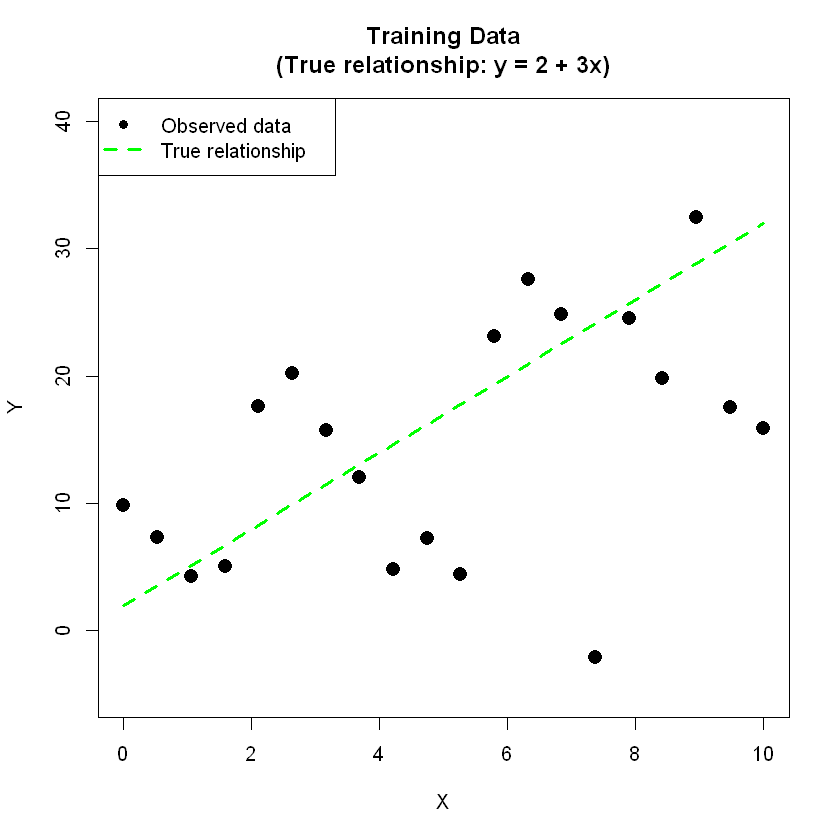

Model 1 (constant mean):
Training error (MSE): 82.8 
This model UNDERFITS - too simple to capture the trend!



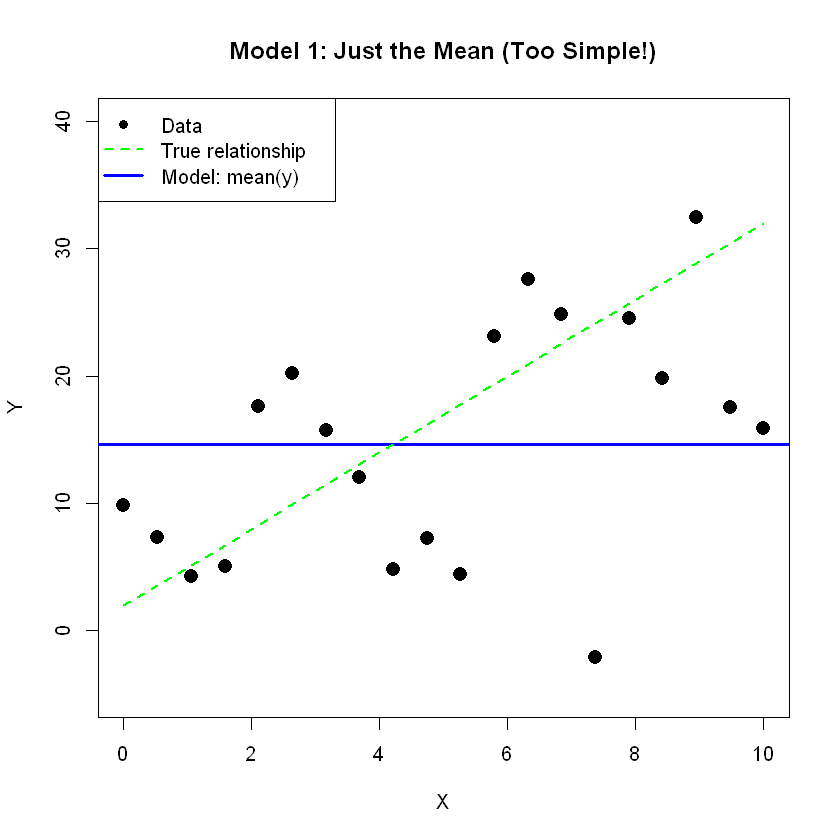

Model 2 (linear):
Training error (MSE): 65 
Better fit than constant mean!



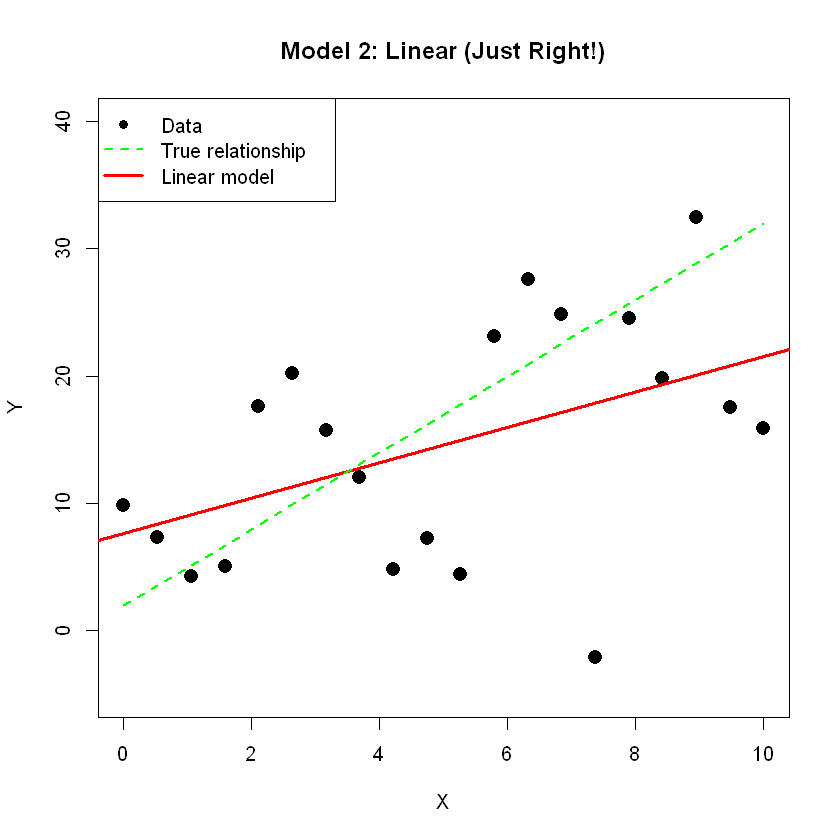

Model 3 (10th degree polynomial):
Training error (MSE): 24.76 
Lowest training error! But look at those wild wiggles...

TRAINING ERROR COMPARISON:
Model 1 (mean):       MSE = 82.8 
Model 2 (linear):     MSE = 65 
Model 3 (poly 10):    MSE = 24.76  <- BEST!

On training data, complex model wins!
But wait... let's test on NEW data...

TEST ERROR (on new data):
Model 1 (mean):       MSE = 102.44 
Model 2 (linear):     MSE = 61.43  <- BEST!
Model 3 (poly 10):    MSE = 99.91  <- WORST!

SURPRISE! The complex model that fit training data perfectly
performs TERRIBLY on new data!

This is OVERFITTING.



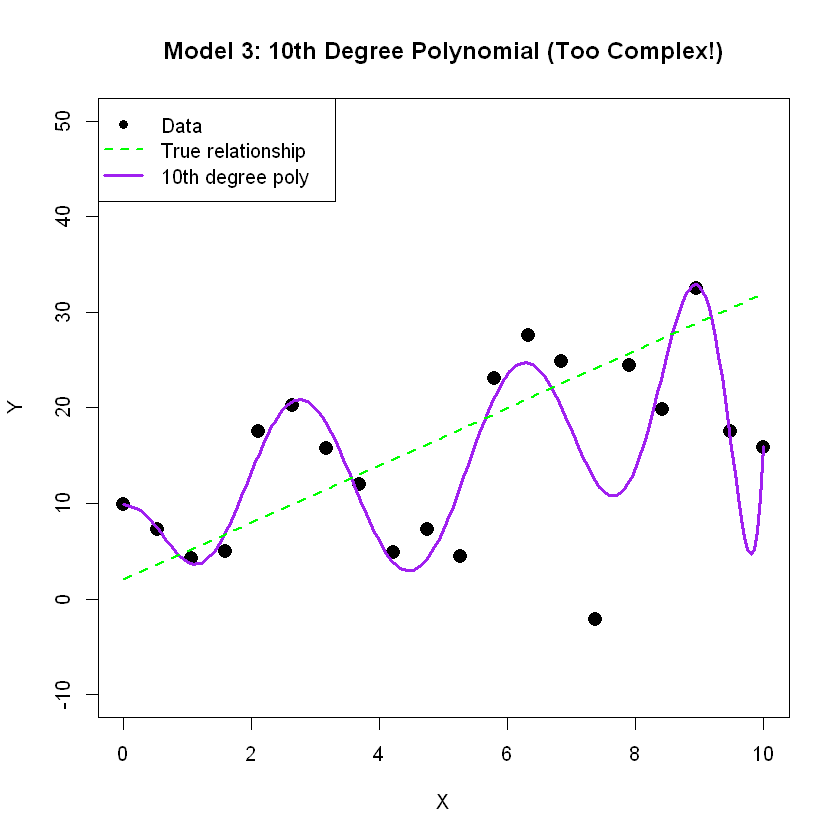

Notice how the polynomial model makes WILD predictions
outside the training range and even within it!



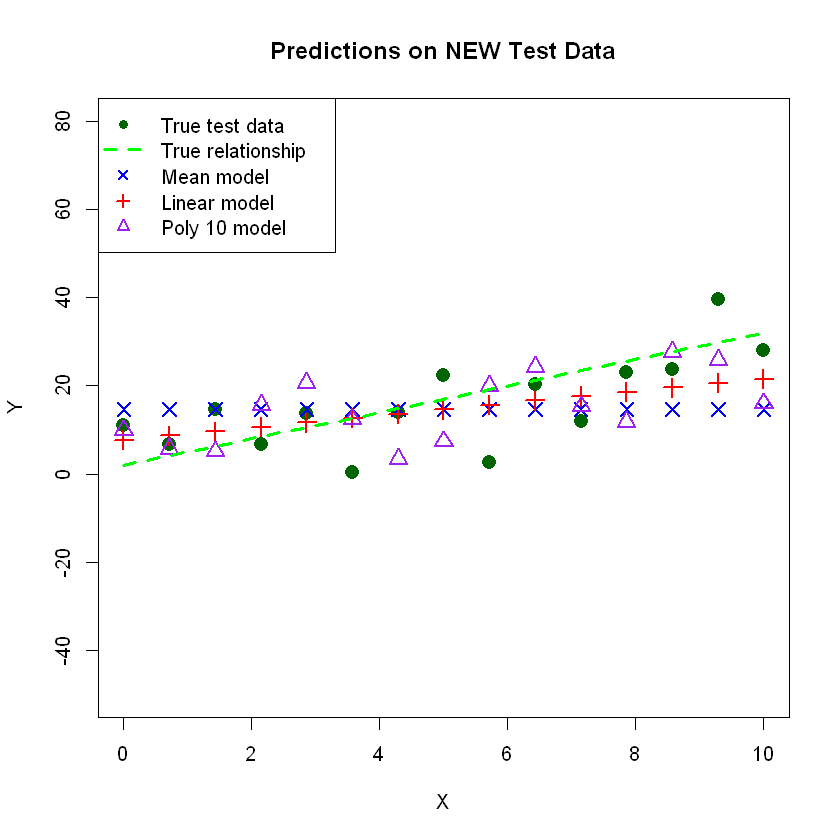

AVERAGE ERRORS OVER 100 SIMULATIONS:

Training Error:
Mean model:   139.22 
Linear:       55.4 
Poly 10:      27.23  <- Best on training

Test Error:
Mean model:   148.22 
Linear:       66.3  <- Best on test!
Poly 10:      92.45  <- Disaster!

YOUR TURN: What's the right degree polynomial?



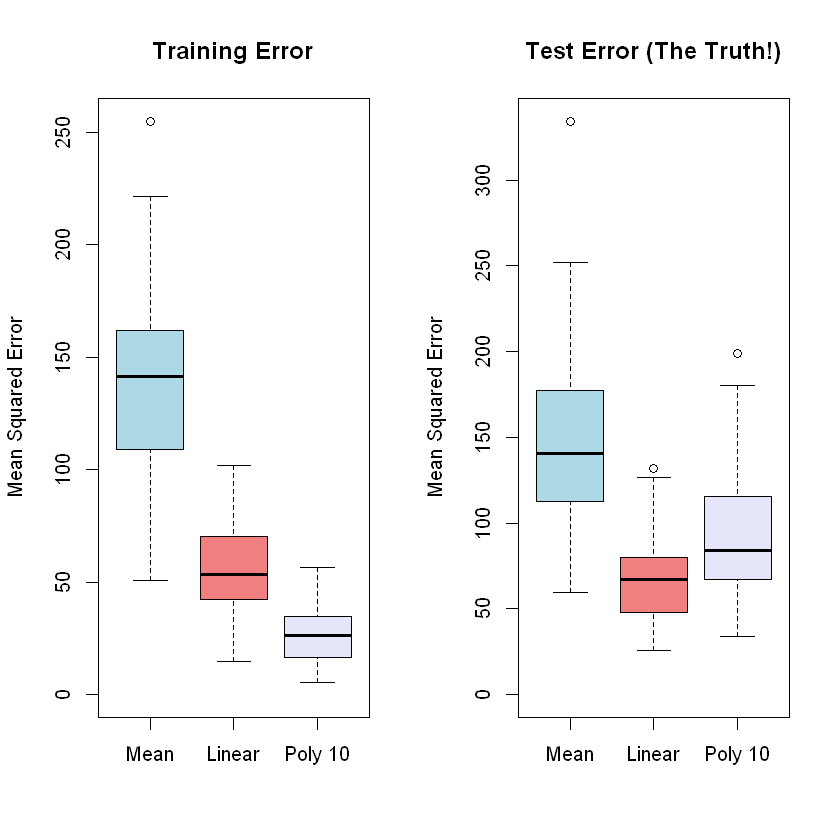

Optimal degree (lowest test error): 1 

OBSERVATION:
- Training error ALWAYS decreases with complexity
- Test error has a U-shape: decreases then increases
- Sweet spot is where test error is minimized
- This is the BIAS-VARIANCE TRADEOFF

WHY THIS MATTERS IN BIOLOGY:

Example 1: Gene Expression Models
- Small sample size (n=20 mice)
- Many potential predictors (20,000 genes!)
- If you fit complex model, you'll overfit to noise
- Need regularization or feature selection

Example 2: Growth Curves
- True relationship might be logistic (sigmoid)
- Fitting 10th degree polynomial overfits
- Better to use mechanistic model (logistic equation)

Example 3: Dose-Response Curves
- Often follow Hill equation (sigmoidal)
- High-degree polynomial might fit perfectly
- But makes nonsense predictions at new doses

LESSON: Use domain knowledge to choose appropriate complexity!
Don't just maximize fit to training data.



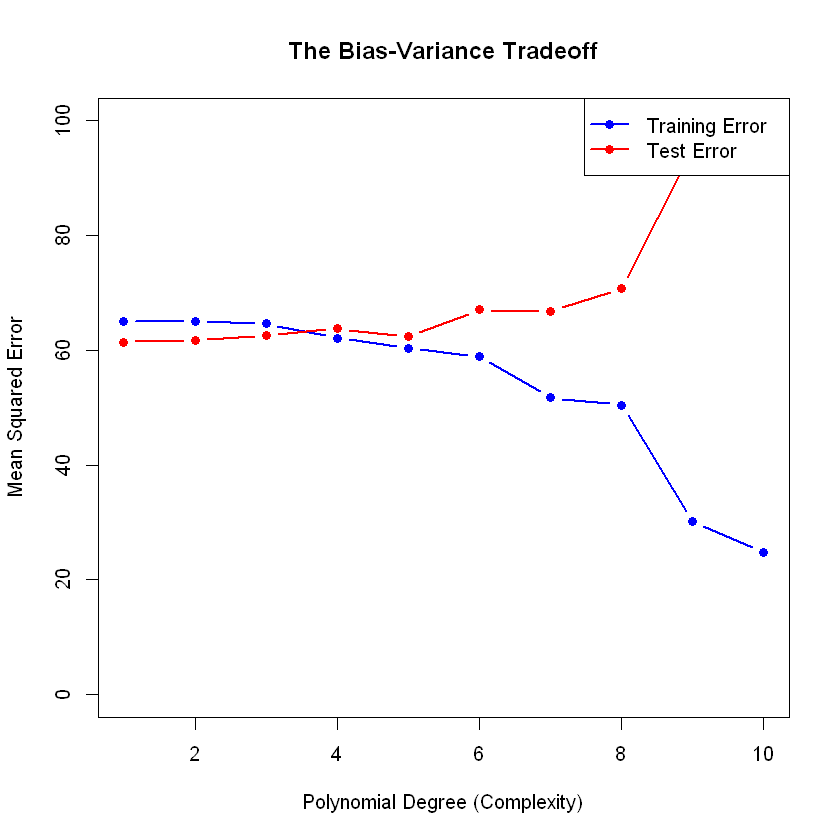

In [1]:
# -----------------------------------------------------------------------------
# DISCUSSION QUESTIONS
# -----------------------------------------------------------------------------
#
# 1. Why does training error always decrease with model complexity,
#    but test error doesn't?
#
# 2. If you only had the training data (no test set), how would you
#    choose the right model complexity? (Hint: cross-validation!)
#
# 3. In the polynomial example, we knew the true relationship was linear.
#    In real biology, we don't know the truth. How do we proceed?
#
# 4. Occam's Razor says "prefer simpler models". But sometimes biology
#    IS complex. How do you balance simplicity vs. accuracy?
#
# 5. What's the connection between overfitting and p-hacking?
#    (Both involve fitting to noise!)
#
# 6. If you have a dataset with n=10 and 100 potential predictors,
#    what will happen if you include all 100 in your model?
#
# =============================================================================